In [ ]:
#Dependencies
import numpy as np # Linear algebra
import pandas as pd # Data processing
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6,6)

import sklearn

from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant
from keras.layers.merge import add

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
dev = 'cuda'

In [ ]:
!pip install transformers
!pip install catalyst

     |████████████████████████████████| 1.1MB 8.9MB/s 
     |████████████████████████████████| 1.1MB 31.8MB/s 
     |████████████████████████████████| 3.0MB 49.2MB/s 
     |████████████████████████████████| 890kB 52.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=21ecc11ddf621a130e0836bcf9240f7e83de759c35c26b1fc30b31e5bff0592b
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 460kB 9.8MB/s 
     |████████████████████████████████| 163kB 13.2MB/s 
     |████████████████████████████████| 317kB 17.1MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 


In [ ]:
# Core
import pandas as pd
import numpy as np
# Data Visualization
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
# SKlearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
# PyTorch 
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
# Transformers 
from transformers import AutoConfig, AutoModel, AutoTokenizer
# Catalyst
from catalyst.dl import SupervisedRunner
from catalyst.dl.callbacks import AccuracyCallback, F1ScoreCallback, OptimizerCallback
from catalyst.dl.callbacks import CheckpointCallback, InferCallback
from catalyst.utils import set_global_seed, prepare_cudnn
# Extras
import warnings
warnings.filterwarnings('ignore')
import os
import logging
from typing import Mapping, List
import datetime as dt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from IPython.display import HTML, Image
# Better Reports
pd.set_option("display.max_columns", 100)
th_props = [('font-size', '13px'), ('background-color', 'white'), 
            ('color', '#666666')]
td_props = [('font-size', '15px'), ('background-color', 'white')]
styles = [dict(selector="td", props=td_props), dict(selector="th", 
            props=th_props)]
# Plots visualization improvement
%config InlineBackend.figure_format = 'retina'

In [ ]:
import nltk
import string
import gensim
import pandas as pd
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
from gensim import corpora, models

In [ ]:
#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Google colab mount stage
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#json to 
#df = pd.read_json('../data/News_Category_Dataset_v2.json', lines=True)
df = pd.read_json('/content/drive/My Drive/Colab Notebooks/W&J/News_Category_Dataset_v2.json', lines=True)

In [ ]:
# To display entire information
pd.set_option('display.max_colwidth', -1)

In [ ]:
#data overview
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26


In [ ]:
#data shape (large dataset about to 0.2 millions)
df.shape

(200853, 6)

In [ ]:
#NON null/NaN values
df.isna().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

{'category': 0, 'headline': 6, 'authors': 36620, 'link': 0, 'short_description': 19712, 'date': 0}


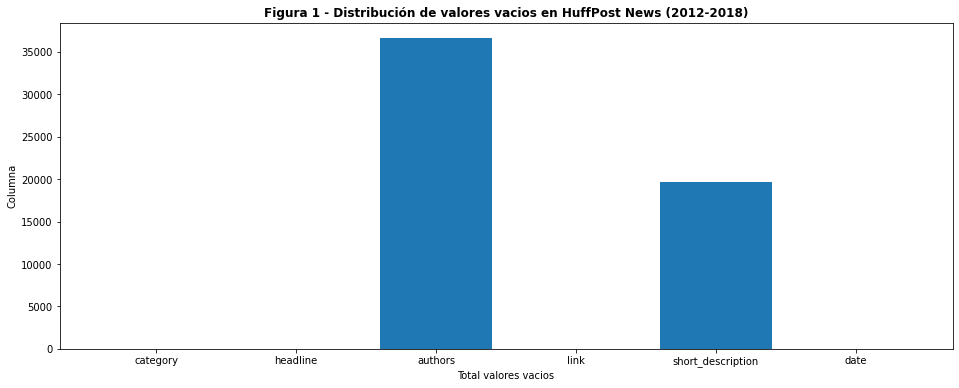

In [ ]:
#empty values
d = dict()

for column in df.columns:
  d[column] = len(df[df[column] == ''].index)


plt.figure(figsize=(16,6))
plt.bar(d.keys(), d.values());
plt.xlabel("Total valores vacios")
plt.ylabel("Columna")
plt.title("Figura 1 - Distribución de valores vacios en HuffPost News (2012-2018)",
          fontweight="bold", size=12);
print(d)

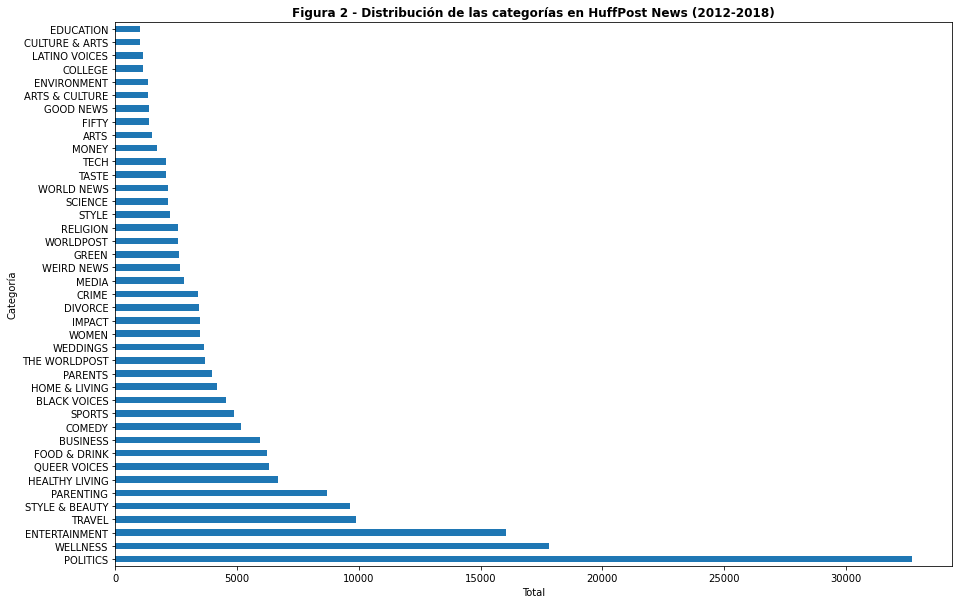

In [ ]:
#categories distribution
df['category'].value_counts().plot(kind='barh', figsize=(15,10))
plt.xlabel("Total")
plt.ylabel("Categoría")
plt.title("Figura 2 - Distribución de las categorías en HuffPost News (2012-2018)",
          fontweight="bold", size=12);

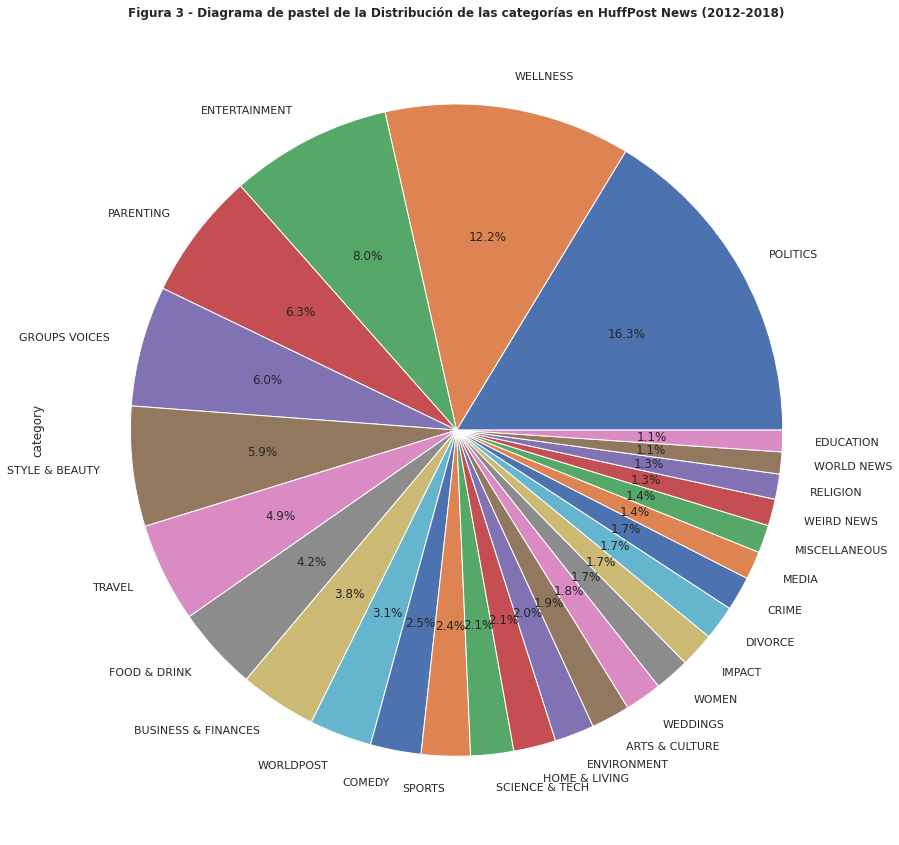

In [ ]:
#pie-plot categories distribution
fig, ax = plt.subplots(1, 1, figsize=(15,15))
df['category'].value_counts().plot.pie( autopct = '%1.1f%%');
plt.title("Figura 3 - Diagrama de pastel de la Distribución de las categorías en HuffPost News (2012-2018)",
          fontweight="bold", size=12);

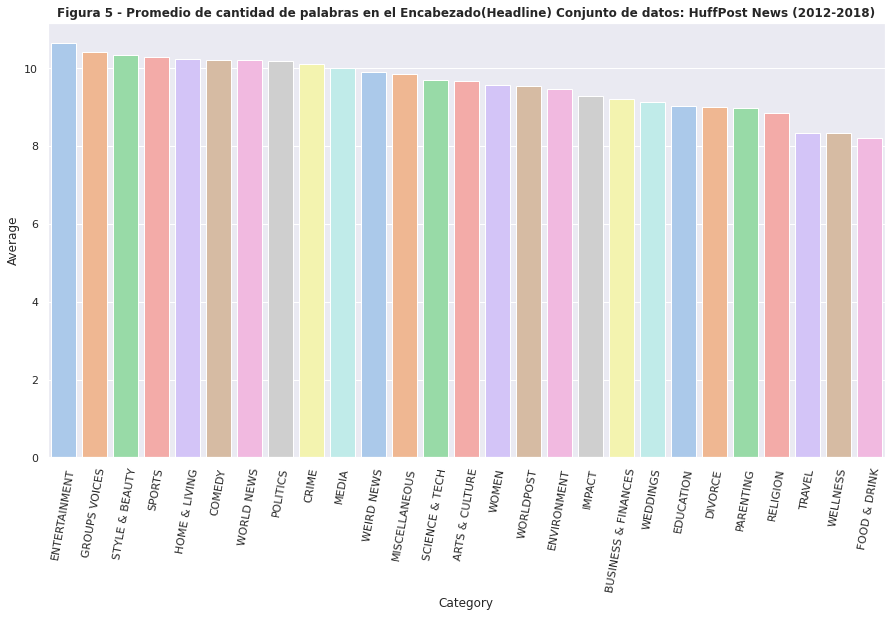

In [ ]:
categories = df["category"].unique()
aux = []
j = 0
for i in categories:
    df_aux = df[df["category"] == i]
    aux.append(np.mean(df_aux['headline'].apply(lambda x : len(x.split()))))
    j = j+1

df_aux = pd.DataFrame({
    "Category" : categories,
    "Average": aux
}
)

df_aux = df_aux.sort_values(['Average'], ascending=False).reset_index(drop=True)

sns.set(rc={'figure.figsize':(15,8)})

ax = sns.barplot(x="Category", y="Average", data=df_aux, palette=sns.color_palette("pastel"))
plt.title("Figura 5 - Promedio de cantidad de palabras en el Encabezado(Headline) Conjunto de datos: HuffPost News (2012-2018)",
          fontweight="bold", size=12);
plt.xticks(rotation=80);

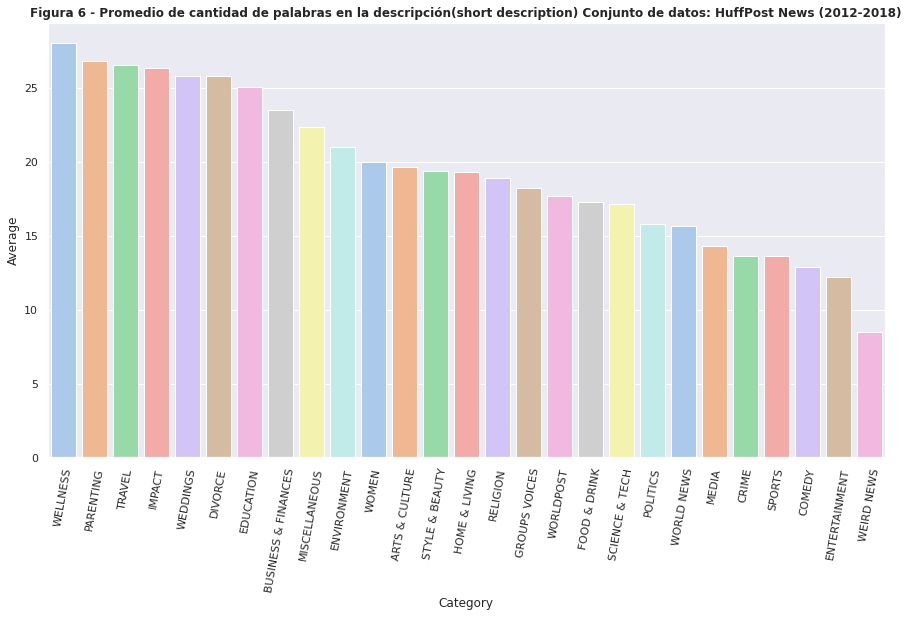

In [ ]:
categories = df["category"].unique()
aux = []
j = 0
for i in categories:
    df_aux = df[df["category"] == i]
    aux.append(np.mean(df_aux['short_description'].apply(lambda x : len(x.split()))))
    j = j+1

df_aux = pd.DataFrame({
    "Category" : categories,
    "Average": aux
}
)

df_aux = df_aux.sort_values(['Average'], ascending=False).reset_index(drop=True)

sns.set(rc={'figure.figsize':(15,8)})

ax = sns.barplot(x="Category", y="Average", data=df_aux, palette=sns.color_palette("pastel"))
plt.title("Figura 6 - Promedio de cantidad de palabras en la descripción(short description) Conjunto de datos: HuffPost News (2012-2018)",
          fontweight="bold", size=12);
plt.xticks(rotation=80);

## `3. ¿Qué se puede decir de los autores a partir de los datos?`

In [ ]:
#count the number of author in the dataset
#news.authors.value_counts()
total_authors = df.authors.nunique()
df_counts = df.shape[0]
print('Total Number of authors : ', total_authors)
print('avg articles written by per author: ' + str(df_counts//total_authors))
print('Total news counts : ' + str(df_counts))

Total Number of authors :  27993
avg articles written by per author: 7
Total news counts : 200853


In [ ]:
authors_news_counts = df.authors.value_counts()
sum_contribution = 0
author_count = 0
for author_contribution in authors_news_counts:
    author_count += 1
    if author_contribution < 80:
        break
    sum_contribution += author_contribution
print('{} de las noticias es contribuida por {} de los autores, entonces {} % de las noticias es contribuida por {} % de los autores'.
      format(sum_contribution, author_count, format((sum_contribution*100/df_counts), '.2f'), format((author_count*100/total_authors), '.2f')))

116604 de las noticias es contribuida por 259 de los autores, entonces 58.05 % de las noticias es contribuida por 0.93 % de los autores


In [ ]:
avg_contribution = {}

for top_author in [x for x in df.authors.value_counts()[0:100].index if x != '']:
  particular_author_news = df[df['authors'] == top_author]
  series = particular_author_news.groupby(by='category')['text'].count()
  avg_contribution[top_author] = sum(series.sort_values()[::-1][0:3].values) / sum(series.sort_values()[::-1].values)

In [ ]:
print("La contribución promedio de las tres categorias más escritas para el top 100 de los autores con más articulos es  {} %".format((sum(avg_contribution.values()) / len(avg_contribution.values()) * 100)))

La contribución promedio de las tres categorias más escritas para el top 100 de los autores con más articulos es  87.65607339130078 %
